In [1]:

from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()

breast.target_names



array(['malignant', 'benign'], dtype='<U9')

In [2]:
import pandas as pd

df = pd.DataFrame( data    = breast['data'],         
                      columns =  breast['feature_names']) 

df['result']=breast['target']

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Las variables son numéricas pero de una escala muy diferente por lo que para determinadas técnicas (como las basadas en distancia, como el k-NN, y en regresión de variables, como las redes neuronales) suele ser conveniente re-escalar los datos 

In [3]:
df['result'].value_counts()/df['result'].count()*100

1    62.741652
0    37.258348
Name: result, dtype: float64

La clase 'maligna' es más frecuente que la benigna (aprox. 2/3 frente a 1/3)

## k-NN con distintos valores de k con validación cruzada en k partes estratificadas 

OJO: El valor de k (número de vecinos) y el de k de las k-partes o k-folds no están relacionados. Son totalmente independientes. El valor de k que nos interesa "optimizar" es el de los vecinos.

In [4]:
# Como la proporción de clases a predecir está desbalanceada 
# usamos k-fold estratificado que mantiene la proporción en cada "fold"
from sklearn.model_selection import StratifiedKFold
from sklearn import neighbors

import numpy as np
import matplotlib.pyplot as plt

# Creamos n_splits particiones, barajando los datos (shuffle) y "fijando" la aleatoriedad 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


train_k_results_mean=[]
train_k_results_std=[]
test_k_results_mean=[]
test_k_results_std=[]

rango_k=range(1,15)

k_values=rango_k

for k in rango_k: 
    # Creamos el clasificador de k-NN
    #   Podemos fijar los pesos como 'uniform' o inv. proporcionales a la distancia 'distance'
    #   El parámetro p es el orden de la métrica de Minkowski (1 Manhattan, 2 Euclídea)
    clf = neighbors.KNeighborsClassifier(k, weights='distance', p=2)
    
    train_results=[]
    test_results=[]
    
    for train_index, test_index in skf.split(breast.data, breast.target):
        
        X_train, X_test = breast.data[train_index], breast.data[test_index]
        y_train, y_test = breast.target[train_index], breast.target[test_index]
        
        clf.fit(X_train, y_train)
        
        train_results.append(clf.score(X_train, y_train))
        test_results.append(clf.score(X_test, y_test))
    
    
    train_k_results_mean.append(np.mean(train_results))
    train_k_results_std.append(np.std(train_results))
    test_k_results_mean.append(np.mean(test_results))
    test_k_results_std.append(np.std(test_results))
    
     

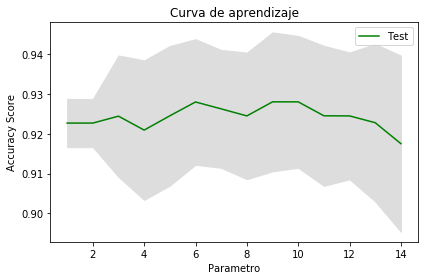

In [5]:
     
    
# Dibujamos la línea con la accuracy (exactitud) en el test
# No dibujamos la de entrenamiento porque en el k-NN está siempre en 100
#plt.plot(k_values, train_k_results_mean, color="r",  label="Training")
plt.plot(k_values, test_k_results_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(test_k_results_mean)-np.array(test_k_results_std)
upper_limit=np.array(test_k_results_mean)+np.array(test_k_results_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Con k=4 vecinos tenemos una accuracy muy similar a las óptimas (k=6, 10, 11), pero con menos desviación típica entre los folds, por lo que varía menos. Además, es un modelo más sencillo al tener un k menor.





## Repetición del proceso: Datos escalados



In [6]:
# Normalizamos los datos con StardardScaler. Para cada variable se resta su media y se divide entre su desviación típica.
# Otra opción sería utilizar una transformación de rango donde 0 sea el valor mínimo de la variable y 1 el máximo. 
# Esta transformación se puede hacer con MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(breast.data)
breast_scaled=scaler.transform(breast.data)

In [7]:
# Creamos n_splits particiones, barajando los datos (shuffle) y "fijando" la aleatoriedad 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


train_k_results_mean=[]
train_k_results_std=[]
test_k_results_mean=[]
test_k_results_std=[]

rango_k=range(1,15)

k_values=rango_k

for k in rango_k: 
    # Creamos el clasificador de k-NN
    #   Podemos fijar los pesos como 'uniform' o inv. proporcionales a la distancia 'distance'
    #   El parámetro p es el orden de la métrica de Minkowski (1 Manhattan, 2 Euclídea)
    clf = neighbors.KNeighborsClassifier(k, weights='distance', p=2)
    
    train_results=[]
    test_results=[]
    
    for train_index, test_index in skf.split(breast_scaled, breast.target):
        
        X_train, X_test = breast_scaled[train_index], breast_scaled[test_index]
        y_train, y_test = breast.target[train_index], breast.target[test_index]
        
        clf.fit(X_train, y_train)
        
        train_results.append(clf.score(X_train, y_train))
        test_results.append(clf.score(X_test, y_test))
    
    
    train_k_results_mean.append(np.mean(train_results))
    train_k_results_std.append(np.std(train_results))
    test_k_results_mean.append(np.mean(test_results))
    test_k_results_std.append(np.std(test_results))
    
          
    


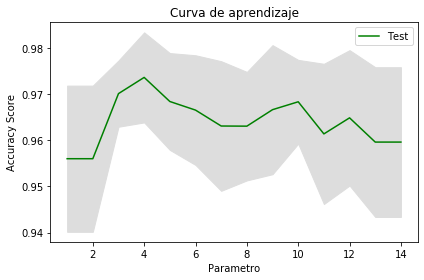

In [8]:
# Dibujamos la línea de la exactitud media en las partes de test
#plt.plot(k_values, train_k_results_mean, color="r",  label="Training")
plt.plot(k_values, test_k_results_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(test_k_results_mean)-np.array(test_k_results_std)
upper_limit=np.array(test_k_results_mean)+np.array(test_k_results_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

En este caso obtenemos valores muy superiores a los que obtenemos con las variables sin normalizar. Y con valores de k entre 3 y 10 se obtienen valores en torno a 0.97. Como en el caso anterior optamos por k=3 que tiene menos desviación típica.

Sin emabrgo, en este caso, la tasa de aciertos (o exactitud) ha subido al 0.97, mientras que antes estaba en torno a 0.93.

SEGUIR OPTIMIZANDO EL CLASIFICADOR: Una opción a probar es reducir la dimensionalidad del conjunto de datos, es decir, el número de variables, ya que es posible que contenga variables superfluas.

# Analizamos los resultados del mejor k-NN con otras métricas

In [9]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Importamos también un asistente para hacer la validación cruzada más sencilla
from sklearn.model_selection import cross_validate

In [10]:
# Escribimos las métricas que queremos evaluar
# Precisión, Exhausitividad y F1 se calculan para cada clase
# Existen diferentes formas de agregar el resultado de cada clase 
# Nosotors optamos por calcular el valor de cada clase, y hacer una media ponderada según
# la proporción de instancias de cada clase en la muestra
# Esto lo hacemos porque la muestra está desbalanceada (diferente número de instancias)
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']


# Los mejores resultados se obtenían para k=3 sobre los datos re-escalados
clf = neighbors.KNeighborsClassifier(3, weights='distance', p=2)

# Calculamos las métricas sobre los datos escalados utilizando validación cruzada
# Este asistente simplifica mucho el proceso
# Por defecto usa "estratificación", que es la opción que tomamos antes
scores = cross_validate(clf, breast_scaled, breast.target,
                         scoring=scoring_metrics, cv=5,
                         return_train_score=False)

# scores te devuelve un diccionario con varios elementos, 
# entre ellos los resultados de las métricas elegidas en el test
scores

{'fit_time': array([0.00092101, 0.        , 0.00475717, 0.        , 0.00412178]),
 'score_time': array([0.0151577 , 0.017138  , 0.02126098, 0.02280164, 0.01997423]),
 'test_precision_weighted': array([0.97394424, 0.95646502, 0.98278579, 0.95104011, 0.92920354]),
 'test_recall_weighted': array([0.97391304, 0.95652174, 0.98230088, 0.94690265, 0.92920354]),
 'test_f1_weighted': array([0.97384955, 0.95641591, 0.98220795, 0.94593675, 0.92920354])}

In [11]:
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.9586877399166636
Exhaustividad ponderada media:  0.9577683724509427
F1 ponderado media:  0.9575227389525504


## Desglose de las métricas para cada clase

NOTA: Estas métricas que vamos a calcular no son obtenidas por un único clasificador, sino por una agregación de los k clasificadores estimados en el k-fold


In [12]:
# Vamos a observar ahora las predicciones agregadas y pintar las métricas para cada clase y la matriz de confusión
# Para ello usamos un asistente similar al anterior pero que devuelve las predicciones generadas
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(clf, breast_scaled, breast.target, cv=5)

# En llugar de elegir las métricas, lo que hacemos es usar una
# utilidad de sklearn que nos da las que conocemos
from sklearn.metrics import classification_report


cr=classification_report(breast.target,predictions, target_names=breast.target_names)

print(cr)





              precision    recall  f1-score   support

   malignant       0.97      0.92      0.94       212
      benign       0.95      0.98      0.97       357

    accuracy                           0.96       569
   macro avg       0.96      0.95      0.95       569
weighted avg       0.96      0.96      0.96       569



In [13]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[195  17]
 [  7 350]]


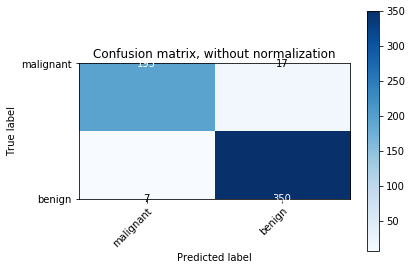

In [14]:
plot_confusion_matrix(breast.target,predictions, normalize=False, classes=breast.target_names)